# Writing Functions

As humans, we can only keep a few items in our own working memory at a time. Trying to comprehend a Python script with hundreds of lines of code can be quite daunting.

Thankfully, we can make this easier by breaking programs down into **functions** to make them easier to understand. We have used built-in functions, like `print()` in the past, but we can also write our own custom functions. 

Custom functions help us understand larger/more complicated ideas by encapsulating separate parts of our program, allowing us to view each as a single “thing”. Importantly, it also lets us re-use pieces of code without having to duplicate dozens of lines of code over and over again. 

Objectives:
*Define a function using `def` with a name, parameters, and a block of code.*



In [60]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

We can define a custom function using the keyword `def` (short for "define"), followed by the desired function name, parentheses, and a colon.

In [62]:
def print_greeting():
    print('Hello!')

Defining a function does not run the code within it. You need to **call** the function to run it.

In [63]:
print_greeting()

Hello!


We can also add **parameters** to functions. Python matches the **arguments** in the call to the parameters in the function definition.

In the function call, we specify the values for `year`, `month`, and `day` in same order in function definition.

Within the function, these parameters act like variables we have used before. However, they are only active within the **scope** of the function.

**Parameters** refer to what we specify in the function definition, and **arguments** are their values in the function call. However, if you mix them up, people will still know what you're talking about!

In [64]:
def print_date(year, month, day):
    joined = str(year) + '/' + str(month) + '/' + str(day)
    print(joined)

print_date(1871, 3, 19)

1871/3/19


Or, we can name the arguments when we call the function, which allows us to specify them in any order:

In [65]:
print_date(month=3, day=19, year=1871)

1871/3/19


Functions may return a result (a value) to their caller using `return`. Here we define a function called `average()` that takes a list and returns the mean.

In [66]:
def average(values):
    s = sum(values) # sum
    n = len(values) # number of vals
    return s/n

a = average([1, 3, 4])
print('average:', a)

average: 2.6666666666666665


We need to be careful defining functions. If this function is called on an empty list, for instance, we will get an error.

In [67]:
average([])

ZeroDivisionError: division by zero

We can design functions in ways to avoid these errors by adding in conditionals.

In [68]:
def better_average(values):
    average = None
    
    if len(values) > 0: # list isnt empty
        s = sum(values) # sum
        n = len(values) # number of vals 
        average = s/n
    
    return average

print(better_average([]))

None


`None` is a special keyword in Python with no value. It is not equivalent to `0` or `False`.

Every function returns something. A function that doesn’t explicitly return a value automatically returns `None`.

In [69]:
result = print_date(1871, 3, 19)
print('result of call is:', result)

1871/3/19
result of call is: None


### Question 1
What is the error in the code below?

In [87]:
def another_function
    print("Syntax errors are annoying.")
    print("But at least python tells us about them!")
    print("So they are usually not too hard to fix.")

### Question 2 
What does this code return?

In [86]:
def report(pressure):
    print('pressure is', pressure)

print('calling', report, 22.5)

## Default values

For the parameters we have defined, we can also provide default values.

In [72]:
def happy_birthday(name='Fred'):
    print('Happy Birthday,', name)

happy_birthday('Sarah')
happy_birthday()

Happy Birthday, Sarah
Happy Birthday, Fred


When defining a function, we can use a combination of parameters with and without default values. However, parameters with default values must go **after** those without them.

In [73]:
def quadratic_equation(a, b, c, negative=False):
    sqr_rt = (b**2 - 4*a*c)**(1/2)
    
    if negative:
        x = (-b - sqr_rt) / (2*a)
    
    else:
        x = (-b + sqr_rt) / (2*a)
    
    return x

quadratic_equation(1, 7, 10)

-2.0


### Question 3
Does order of operations matter for defining and calling functions?

In [74]:
fahr_to_celsius(32)

def fahr_to_celsius(temp):
    return ((temp - 32) * (5/9))

## Composing Functions

Now that we’ve seen how to turn Fahrenheit into Celsius, we can also write the function to turn Celsius into Kelvin:

In [76]:
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15

print('freezing point of water in Kelvin:', celsius_to_kelvin(0.))

freezing point of water in Kelvin: 273.15


What about converting Fahrenheit to Kelvin? We could write out the formula, but we don’t need to. Instead, we can compose the two functions we have already created:

In [77]:
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k

print('boiling point of water in Kelvin:', fahr_to_kelvin(212.0))

boiling point of water in Kelvin: 373.15


This is our first taste of how larger programs are built: we define basic operations, then combine them in ever-larger chunks to get the effect we want. Real-life functions will usually be larger than the ones shown here — typically half a dozen to a few dozen lines — but they shouldn’t ever be much longer than that, or the next person who reads it won’t be able to understand what’s going on.

## Functions for tidying up code

Functions are very useful for consolidating code for repurposing it. 

Below we have an example of calculating the distance between two points without a function.

In [1]:
point1 = [1, 4]
point2 = [4,-2]

distance = ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5
print(distance)

6.708203932499369


With this setup, if we want to calculate distance on any more points, we'll have to repeat the code several times. This is known as code duplication, and can cause issues if there are any typos in the original code or if you want to make a change to code. In these cases, you will need to change every instance you've run it.

When you copy and paste to duplicate, you may also forget to update information.

In [2]:
point3 = [5, 11]
point4 = [2, 8]

distance1 = ((point3[0] - point4[0]) ** 2 + (point3[1] - point4[1]) ** 2) ** 0.5
print(distance1) 

point5 = [5, 11]
point6 = [2, 8]

# easy to forget to change variable names!
distance1 = ((point3[0] - point4[0]) ** 2 + (point3[1] - point4[1]) ** 2) ** 0.5 
print(distance1) 

4.242640687119285
4.242640687119285


We can remove this by defining a function for calculating distance and simply running the function several times.

Limiting code duplication has an important benefit: if you need to change a feature of the code, you will only need to change it one place. 

Additionally, this helps clean up the code. We've given the function an informative name, and you can easily check to see what the function does.

In [3]:
# Define a function to calculate the distance between two points
def calculate_distance(x1, x2):
    d = ((x1[0] - x2[0]) ** 2 + (x1[1] - x2[1]) ** 2) ** 0.5
    return d

# Calculate the distance between the points using the function
print(calculate_distance(point1, point2))
print(calculate_distance(point3, point4))
print(calculate_distance(point5, point6))

# Print the result
print("Distance:", distance)


6.708203932499369
4.242640687119285
4.242640687119285
Distance: 6.708203932499369


Now that we know how to wrap bits of code up in functions, we can make our inflammation analysis easier to read and easier to reuse. First, let’s make a visualize function that generates our plots:

In [78]:
def visualize(filename):

    data = pd.read_csv(filename,header=None) # read in file

    fig, ax = plt.subplots(1, 3, figsize=(10.0, 3.0)) # make blank plot

    ax[0].plot(data.mean())
    ax[0].set_ylabel('average')

    ax[1].plot(data.max())
    ax[1].set_ylabel('max')

    ax[2].plot(data.min())
    ax[2].set_ylabel('min')

    fig.tight_layout()
    plt.show()

Rather than jumbling this code together in one giant for loop, we can now read and reuse with a simple for loop:

https://raw.githubusercontent.com/DeisData/python/master/data/inflammation-01.csv


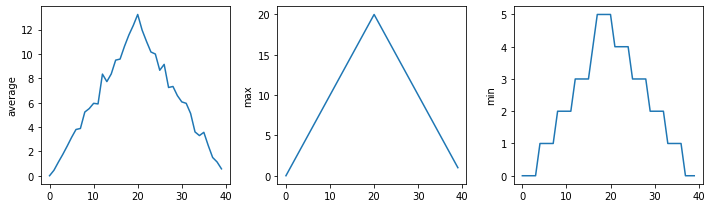

https://raw.githubusercontent.com/DeisData/python/master/data/inflammation-02.csv


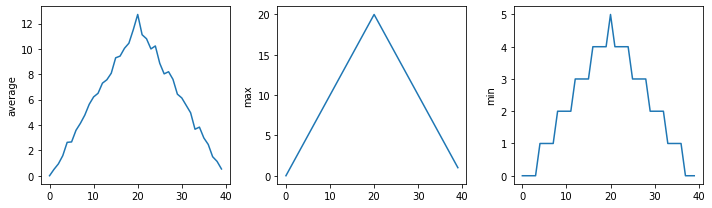

https://raw.githubusercontent.com/DeisData/python/master/data/inflammation-03.csv


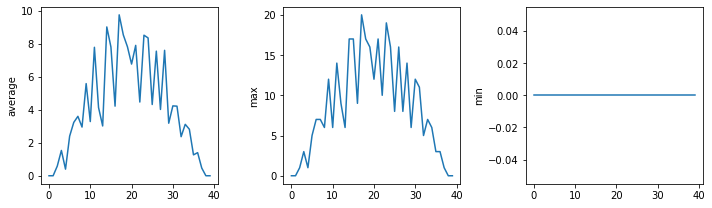

In [79]:
partial_url = "https://raw.githubusercontent.com/DeisData/python/master/data/inflammation-0" # the part of the link all of the csv's share

filenames = [ partial_url + str(i) + ".csv" for i in range(1,4) ] # generates .../inflammation-01.csv through .../inflammation-04.csv

for filename in filenames:
    print(filename)
    visualize(filename)

Limiting code duplication has an important benefit: if you need to change a feature of the code, you will only need to change it one place. 

### Question 4

The code below takes 4 short DNA sequences and calculates the percentage of DNA bases that are either G or C for each of them. This runs the same process for each sequence.

Take the code below and reduce some of the code duplication by creating one or more functions, or with other approaches.

In [89]:
# initialize sequences
dna_sequence1 = 'CGACCAATAGTGATCCACGGATTCTCTGAAGAGTCAGCATGCGGGAAATATACGCACAACTAACGGGACGGCGATTAACGCCAAGCCTGGGCTGAATATT'
dna_sequence2 = 'TGCGGCAGGATTTCGGACCGAACCTTGTCACCCTTACATTCATGCATAGCAGGTTGCGTTGCGTGGCAGCGTGCCCACCACCTCCCGCTGGTTGCCCGTA'
dna_sequence3 = 'AAAGTTGTGGTACTAATCGTATTGTTGCATTGACCCATAAAGATCCTCATTTTACAGAGCACATGAGATCCCGTTGGTATCAACGCCTGATTCTTATAGG'
dna_sequence4 = 'GAGCGAGAGCTTACTGTGTGCTATCCCTCAAGATGCGTTGAAAAGTCAACTCACCAGATACTTAGGCCTGACGAGACATCGATTGCCGGTTCGAAAAGTG'

# sequence 1
As1 = 0
Ts1 = 0
Gs1 = 0
Cs1 = 0

for base in dna_sequence1:
    
    if base == 'G':
        Gs1 += 1
    elif base == 'T':
        Ts1 += 1
    elif base == 'A':
        As1 += 1
    elif base == 'C':
        Cs1 += 1
    
print("GC%:", (Gs1+Cs1)/(Gs1+Cs1+Ts1+As1))

# sequence 2
As2 = 0
Ts2 = 0
Gs2 = 0
Cs2 = 0

for base in dna_sequence2:
    
    if base == 'G':
        Gs2 += 1
    elif base == 'T':
        Ts2 += 1
    elif base == 'A':
        As2 += 1
    elif base == 'C':
        Cs2 += 1
    
print("GC%:", (Gs2+Cs2)/(Gs2+Cs2+Ts2+As2))


# sequence 3
As3 = 0
Ts3 = 0
Gs3 = 0
Cs3 = 0

for base in dna_sequence3:
    
    if base == 'G':
        Gs3 += 1
    elif base == 'T':
        Ts3 += 1
    elif base == 'A':
        As3 += 1
    elif base == 'C':
        Cs3 += 1
    
print("GC%:", (Gs3+Cs3)/(Gs3+Cs3+Ts3+As3))

# sequence 4
As4 = 0
Ts4 = 0
Gs4 = 0
Cs4 = 0

for base in dna_sequence4:
    
    if base == 'G':
        Gs4 += 1
    elif base == 'T':
        Ts4 += 1
    elif base == 'A':
        As4 += 1
    elif base == 'C':
        Cs4 += 1
    
print("GC%:", (Gs4+Cs4)/(Gs4+Cs4+Ts4+As4))

GC%: 0.5
GC%: 0.6
GC%: 0.4
GC%: 0.49


## Add documentation to your functions

If the first thing in a function is a string that isn’t assigned to a variable, that string is attached to the function as its documentation.  This is called a *docstring* and is in triple quotes.

It can be helpful to describe each argument, including the intended data type. 

*Note: You can also use triple quotes elsewhere in code as generic multi-line comments.*



In [81]:
def offset_mean(data, target_mean_value):
   """
   Return a new array containing the original data
   with its mean offset to match the desired value.
   ------------------------------------------------
   data (numpy.array) - n x m dimensional array
   target_mean_value (float) - desired mean value
   """
   return (data - np.mean(data)) + target_mean_value

In [82]:
help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, target_mean_value)
    Return a new array containing the original data
    with its mean offset to match the desired value.
    ------------------------------------------------
    data (numpy.array) - n x m dimensional array
    target_mean_value (float) - desired mean value



We can label each parameter with the desired data type, as well. Note that this will not enforce each data type, so you will need to build in checks to actually limit the data types of arguments.

In [83]:
def my_func(x:int):
    print(x)

my_func('Not a number')



Not a number


We can use conditionals to do these sorts of checks. If you don't mind having errors thrown, you can use an `assert` statement, which allows you to make a quick boolean expression check with custom error message. The general format is `assert BOOLEAN_EXPRESSION, ERROR_MESSAGE`.

In [84]:
def better_func(x:int):
    assert isinstance(x, int), x + " is not int"
    print(x)

better_func('Not a number')

AssertionError: Not a number is not int

## Readable Functions

### Question 5:  
Which one of these functions is more readable - `s()` or `std_dev()`? Why?

In [85]:
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return np.sqrt(d / (len(p) - 1))



def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value

    sample_mean = sample_sum / len(sample)

    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)

    return np.sqrt(sum_squared_devs / (len(sample) - 1))

### References
This lesson is developed from the following resources:
- http://swcarpentry.github.io/python-novice-gapminder/16-writing-functions/index.html
- https://swcarpentry.github.io/python-novice-inflammation/08-func/index.html